# Snap Finance Test

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

applications = pd.read_excel('sample_datasets.xlsx', sheet_name='applications')
customers = pd.read_excel('sample_datasets.xlsx', sheet_name='customers')
stores = pd.read_excel('sample_datasets.xlsx', sheet_name='stores')
marketing = pd.read_excel('sample_datasets.xlsx', sheet_name='marketing')
applications['submit_date'] = pd.to_datetime(applications['submit_date'])
applications['approved_date'] = pd.to_datetime(applications['approved_date'])

## Task 1 – Application volume trends

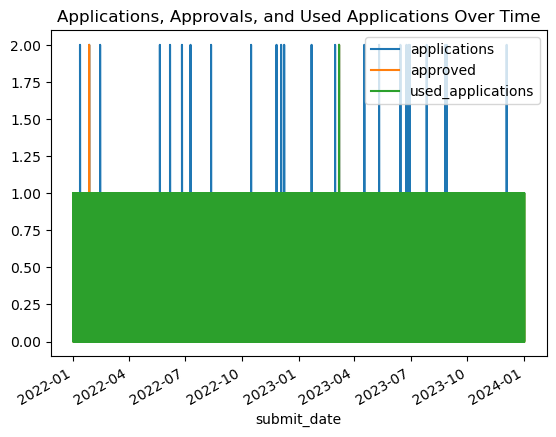

In [23]:
task1 = (applications.assign(used_app=lambda x: x['dollars_used'].fillna(0) > 0).groupby('submit_date').agg(applications=('application_id', 'count'),
             approved=('approved', 'sum'),
             used_applications=('used_app', 'sum')
            ).reset_index())

task1.plot(x='submit_date')
plt.title('Applications, Approvals, and Used Applications Over Time')
plt.show()

## Task 2 – Average approved vs used amount

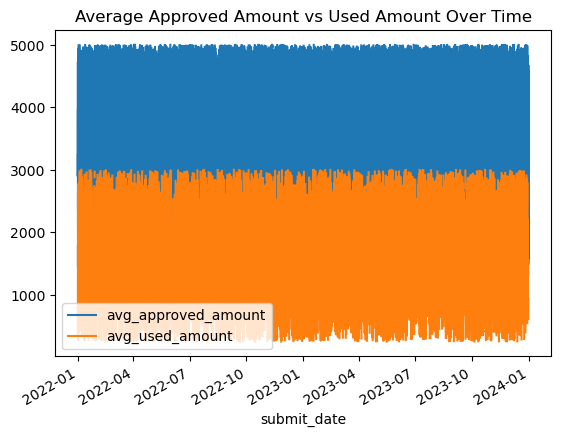

In [25]:
task2 = (applications.groupby('submit_date').agg(avg_approved_amount=('approved_amount', 'mean'),
        avg_used_amount=('dollars_used', 'mean')).reset_index())

task2.plot(x='submit_date')
plt.title('Average Approved Amount vs Used Amount Over Time')
plt.show()

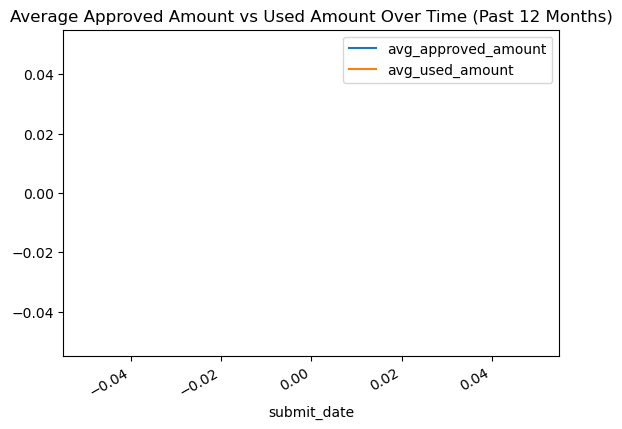

In [26]:
# Filter for the past 12 months
twelve_months_ago = pd.Timestamp.today() - pd.DateOffset(months=12)
recent_apps = applications[applications['submit_date'] >= twelve_months_ago]

# Group and calculate averages
task21 = (recent_apps.groupby('submit_date')
         .agg(avg_approved_amount=('approved_amount', 'mean'),
              avg_used_amount=('dollars_used', 'mean'))
         .reset_index())

# Plot
task21.plot(x='submit_date')
plt.title('Average Approved Amount vs Used Amount Over Time (Past 12 Months)')
plt.show()

## Task 3 – Store-level metrics

In [7]:
store_metrics = (applications.assign(used_app=lambda x: x['dollars_used'].fillna(0) > 0).groupby('store').agg(applications=('application_id', 'count'),
                approved=('approved', 'sum'),approved_amount=('approved_amount', 'sum'),        
                used_applications=('used_app', 'sum'),used_amount=('dollars_used', 'sum')).reset_index())
store_metrics

,store,applications,approved,approved_amount,used_applications,used_amount
0,store_0,284,146,448420.0,69,107970.0
1,store_1,277,136,431736.0,70,114715.0
2,store_10,253,128,388397.0,60,94609.0
3,store_100,257,134,431148.0,63,100645.0
4,store_101,257,130,405727.0,63,107608.0
...,...,...,...,...,...,...
245,store_95,277,141,441915.0,77,128846.0
246,store_96,282,137,433136.0,70,121412.0
247,store_97,240,114,361735.0,60,104116.0
248,store_98,260,114,357341.0,50,85905.0


## Task 4 – Marketing spend vs dollars used

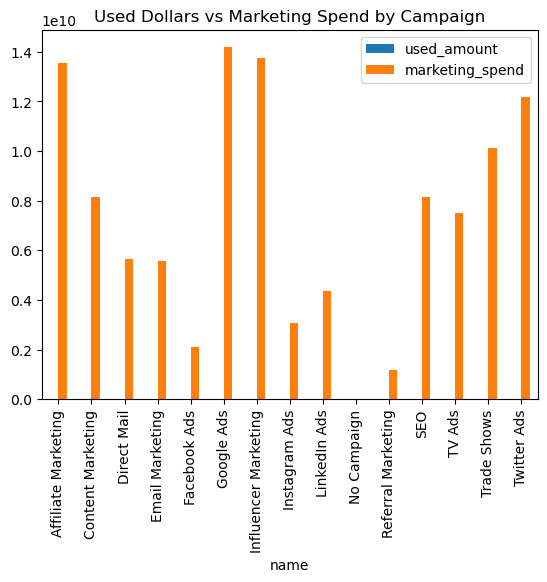

In [11]:
apps_marketing = (applications.merge(customers[['customer_id', 'campaign_id']], on='customer_id', how='left').merge(marketing, left_on='campaign_id', right_on='campaign_id', how='left'))

marketing_perf = (apps_marketing.groupby('name').agg(used_amount=('dollars_used', 'sum'),
                marketing_spend=('spend', 'sum')).reset_index())

marketing_perf.set_index('name').plot(kind='bar')
plt.title('Used Dollars vs Marketing Spend by Campaign')
plt.show()

## Task 5 – Approval rate by lease grade (insight)

In [12]:
lease_grade_perf = (applications.groupby('lease_grade').agg(applications=('application_id', 'count'),        
                    approved=('approved', 'sum')).assign(approval_rate=lambda x: x['approved'] / x['applications']).reset_index())

lease_grade_perf

,lease_grade,applications,approved,approval_rate
0,A,13006,11060,0.850377
1,B,12834,10851,0.845489
2,C,12861,10845,0.843247
3,D,8243,0,0.000000
4,F,18591,0,0.000000
